# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [5]:
# Your code here
df = pd.read_csv("AmesHousing.csv", index_col=0)

In [19]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


The following code checks that you loaded the data correctly:

In [7]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

AssertionError: 

Inspect the contents of the dataframe:

In [8]:
# Run this cell without changes
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [9]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual     29

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

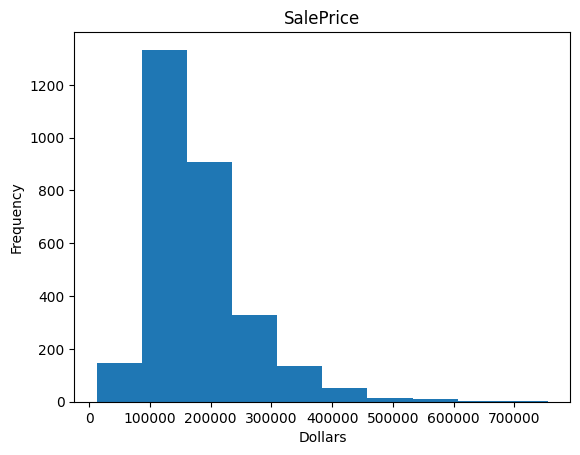

In [12]:
# Your code here
Histogram_SalesPrice = plt.hist(df["SalePrice"])
Title = plt.title("SalePrice")
x_title = plt.xlabel("Dollars")
y_title = plt.ylabel("Frequency")

Now, print out the mean, median, and standard deviation:

In [17]:
# Your code here
print("The mean is", df["SalePrice"].mean())
print("The median is", df["SalePrice"].median())
print("The standard deviation is", df["SalePrice"].std())

The mean is 180796.0600682594
The median is 160000.0
The standard deviation is 79886.692356665


In the cell below, interpret the above information.

In [27]:
# Replace None with appropriate text
"""
The avarge price of the houses is $180,796 with most of the prices
arround $160,000
"""

'\nThe avarge price of the houses is $180,796 with most of the prices\narround $160,000\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

In [22]:
df["Total Bsmt SF"]

Order
1       1080.0
2        882.0
3       1329.0
4       2110.0
5        928.0
         ...  
2926    1003.0
2927     864.0
2928     912.0
2929    1389.0
2930     996.0
Name: Total Bsmt SF, Length: 2930, dtype: float64

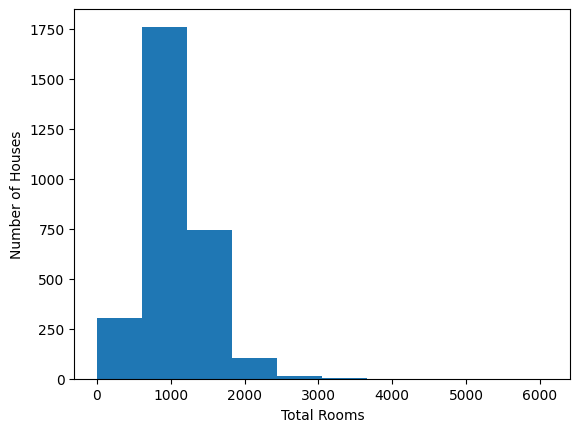

In [24]:
# Your code here
Histogram_TotRmsAbvGrd = plt.hist(df["Total Bsmt SF"])
x_titl = plt.xlabel("Total Rooms")
y_titl = plt.ylabel("Number of Houses")

Now, print out the mean, median, and standard deviation:

In [25]:
# Your code here
print("The mean is", df["Total Bsmt SF"].mean())
print("The median is", df["Total Bsmt SF"].median())
print("The standard deviation is", df["Total Bsmt SF"].std())

The mean is 1051.6145442130419
The median is 990.0
The standard deviation is 440.61506696179697


In the cell below, interpret the above information.

In [26]:
# Replace None with appropriate text
"""
The distribution is right - skewed with a few high values pulling
the mean upwards. There is also a high level of variability seen
in the standard deviation in the total rooms.
"""

'\nThe distribution is right - skewed with a few high values pulling\nthe mean upwards. There is also a high level of variability seen\nin the standard deviation in the total rooms.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

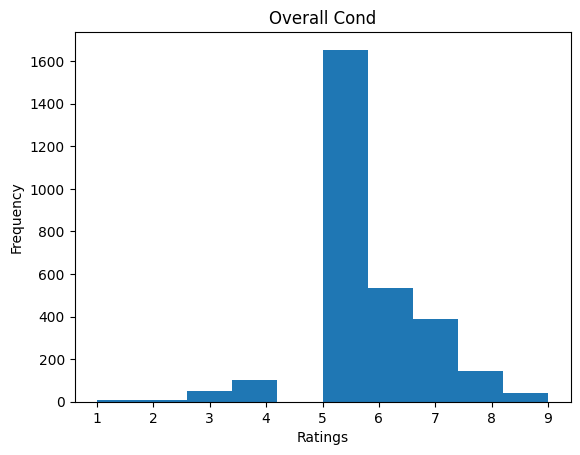

In [29]:
# Your code here
OverallCond_Histogram = plt.hist(df["Overall Cond"])
Titl = plt.title("Overall Cond")
x_tit = plt.xlabel("Ratings")
y_tit = plt.ylabel("Frequency")

Now, print out the mean, median, and standard deviation:

In [30]:
# Your code here
print("The mean is", df["Overall Cond"].mean())
print("The median is", df["Overall Cond"].median())
print("The standard deviation is", df["Overall Cond"].std())

The mean is 5.563139931740614
The median is 5.0
The standard deviation is 1.1115365600303264


In the cell below, interpret the above information.

In [31]:
# Replace None with appropriate text
"""
Most homes have a rating of 5. This is categorical information so
we can't realy too much on difference of the values on the histogram.

"""

"\nMost homes have a rating of 5. This is categorical information so\nwe can't realy too much on difference of the values on the histogram.\n\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [33]:
# Replace None with appropriate code
below_average_condition = df[df["Overall Cond"] < 5]
average_condition = df[df["Overall Cond"] == 5]
above_average_condition = df[df["Overall Cond"] > 5]

The following code checks that you created the subsets correctly:

In [34]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

AssertionError: 

The following code will produce a plot of the distributions of sale price for each of these subsets:

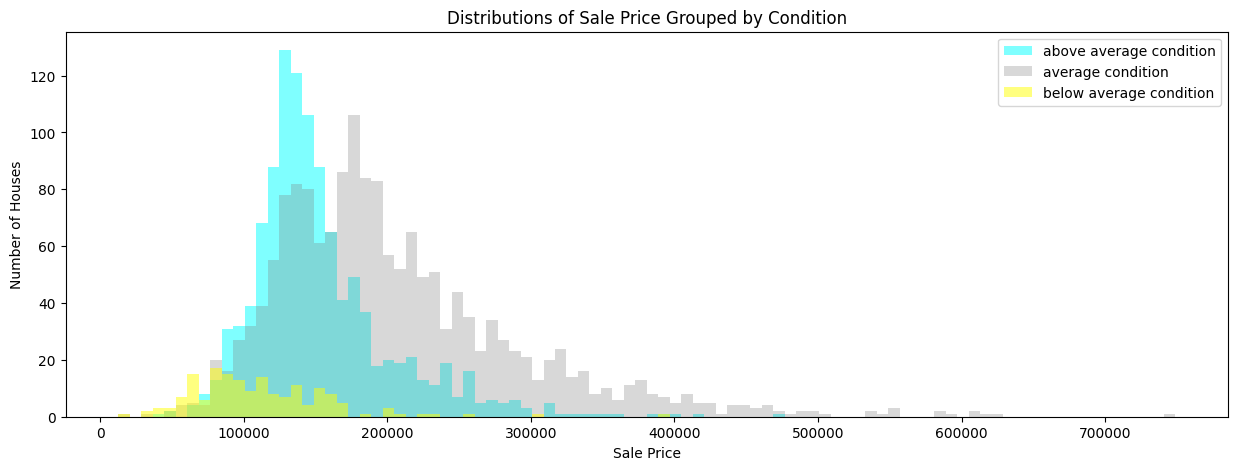

In [35]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
It can be seen that the above average column has fairly priced houses
while the below avare column has lower priced houses.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [37]:
# Your code here

print("NumPy way")
import numpy as np

# Create a df that contains only numeric columns
# and doesn't include SalePrice
numeric_df = df.select_dtypes(include='number').copy()
numeric_df.drop("SalePrice", axis=1, inplace=True)

# Create list of correlations
correlations = []
for col in numeric_df.columns:    
    corr = np.corrcoef(df[col], df["SalePrice"])[0][1]
    # ^ you could also substitute
    # corr = scipy.stats.pearsonr(df[col], df["SalePrice"])[0]
    # if you wanted to use SciPy rather than NumPy
    correlations.append(corr)

# Find the largest value, and the column name at that index
max_corr_value = max(correlations)
max_corr_column = numeric_df.columns[correlations.index(max_corr_value)]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

### Much shorter pandas solution ###

print("\npandas way")
# Get a list of correlations with SalePrice, sorted from smallest
# to largest
correlation_series = df.corr(numeric_only = True)['SalePrice'].sort_values()
# Select second to last correlation, since the highest (last)
# correlation will be SalePrice correlating 100% with itself
max_corr_value = correlation_series.iloc[-2]
max_corr_column = correlation_series.index[-2]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

# Note that there are very small differences in these numbers due to
# floating point rounding errors

NumPy way
Most Positively Correlated Column: Overall Qual
Maximum Correlation Value: 0.7992617947690227

pandas way
Most Positively Correlated Column: Overall Qual
Maximum Correlation Value: 0.7992617947690243


Now, find the ***most negatively correlated*** column:

In [38]:
# Your code here

### NumPy way ###

print("NumPy way")

min_corr_value = min(correlations)
min_corr_column = numeric_df.columns[correlations.index(min_corr_value)]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

### pandas way ###

print ("\npandas way")

# We can just find the smallest value, not the second smallest,
# since we aren't avoiding the perfect correlation with itself
min_corr_value = correlation_series.iloc[0]
min_corr_column = correlation_series.index[0]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

NumPy way
Most Negatively Correlated Column: PID
Minimum Correlation Value: -0.24652121286673606

pandas way
Most Negatively Correlated Column: PID
Minimum Correlation Value: -0.24652121286673673


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

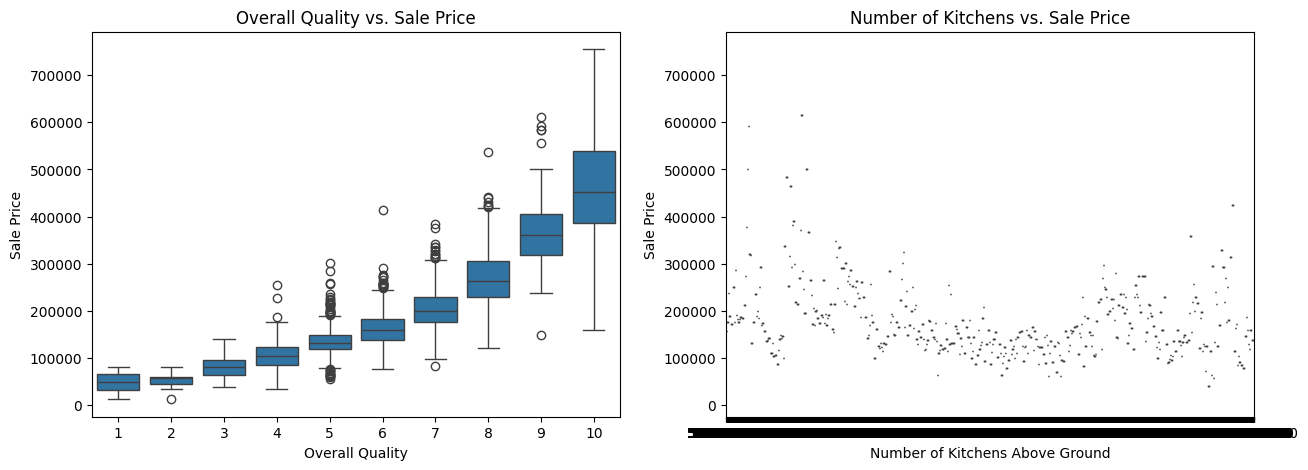

In [39]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_corr_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[min_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs. Sale Price")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Number of Kitchens vs. Sale Price")
ax2.set_xlabel("Number of Kitchens Above Ground")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [40]:
# Replace None with appropriate text
"""
The column with the highest correlation is overall quality.

"""

'\nThe column with the highest correlation is overall quality.\n\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [42]:
# Run this cell without changes
df["Yr Sold"].value_counts().sort_index()

Yr Sold
2006    625
2007    694
2008    622
2009    648
2010    341
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

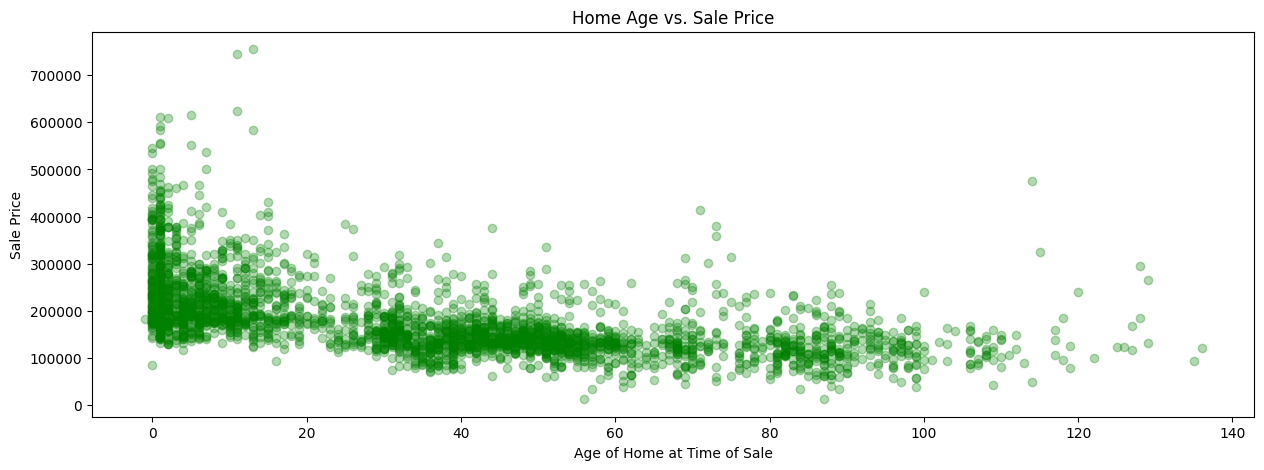

In [44]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["Yr Sold"] - df["Year Built"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [45]:
# Replace None with appropriate text
"""
In general, newer houses appear to be more valuable, with value increasing
as homes age. Interestingly the variance seems to increase once the home
age goes over 100 years, with several above-average sale prices and fewer
home sales in general.
"""

'\nIn general, newer houses appear to be more valuable, with value increasing\nas homes age. Interestingly the variance seems to increase once the home\nage goes over 100 years, with several above-average sale prices and fewer\nhome sales in general.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.